# MMClassification_PythonAPI_train

## 安装 MMClassification

在使用 MMClassification 之前，我们需要配置环境，步骤如下：

- 安装 Python, CUDA, C/C++ compiler 和 git
- 安装 PyTorch (CUDA 版)
- 安装 mmcv
- 克隆 mmcls github 代码库然后安装

因为我们在 Google Colab 进行实验，Colab 已经帮我们完成了基本的配置，我们可以直接跳过前面两个步骤 。

### 检查环境

In [2]:
%cd /content

/content


In [3]:
!pwd

/content


In [4]:
# 检查 nvcc 版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [5]:
# 检查 PyTorch 的安装情况
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.13.1+cu116
True


### 安装 MMCV

MMCV 是 OpenMMLab 代码库的基础库。Linux 环境的安装 whl 包已经提前打包好，大家可以直接下载安装。

需要注意 PyTorch 和 CUDA 版本，确保能够正常安装。

在前面的步骤中，我们输出了环境中 CUDA 和 PyTorch 的版本，分别是 11.1 和 1.9.0，我们需要选择相应的 MMCV 版本。

另外，也可以安装完整版的 MMCV-full，它包含所有的特性以及丰富的开箱即用的 CUDA 算子。需要注意的是完整版本可能需要更长时间来编译。

In [6]:
# 安装 mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.9.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 KB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 25.5 MB/s eta 0:00:00
  Created wheel for mmcv: filename=mmcv-1.7.1-py2.py3-none-any.whl size=930735 sha256=c0c416f06c93bcc181ce7d1cdf90688882fb5dc0adaa6d567c76317fb0cd5b59
  Stored in directory: /root/.cache/pip/wheels/74/0c/f4/cafa17bca99a907f0ea624325aec45e905dd44884a47eae0bf
Successfully built mmcv


### 克隆并安装 MMClassification

接着，我们从 github 上克隆下 mmcls 最新代码库并进行安装。

In [7]:
# 下载 mmcls 代码库
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# 从源码安装 MMClassification
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 12268, done.
remote: Total 12268 (delta 0), reused 0 (delta 0), pack-reused 12268
Receiving objects: 100% (12268/12268), 11.34 MiB | 15.34 MiB/s, done.
Resolving deltas: 100% (8514/8514), done.
/content/mmclassification
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmclassification
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmcls


In [9]:
# 检查 MMClassification 的安装情况
import mmcls
print(mmcls.__version__)

0.25.0


## 使用 Python API 进行模型微调

模型微调是将预训练好的模型在特定的数据集上对模型参数进行非常精细调整的过程，最终让预训练的模型能够适配新的数据集及对应的任务。相比于模型的训练过程，模型微调大大降低了训练的时间，并减少了数据量很小的数据集在训练过程中会出现的过拟合问题。

模型微调的基本步骤如下：

1. 准备新数据集并满足 MMClassification 的要求
2. 根据数据集修改训练配置 
3. 进行训练和验证

更多细节可以查看 [文档](https://mmclassification.readthedocs.io/zh_CN/latest/tutorials/finetune.html).

### 准备数据集并满足 MMClassification 的要求

这里我们下载猫狗分类数据集，关于数据集格式的详细介绍参考 [tools 教程](https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/MMClassification_tools_cn.ipynb)

In [10]:
# 下载分类数据集文件
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir -p data
!unzip -qo cats_dogs_dataset.zip -d ./data/

--2023-02-05 02:17:23--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2023-02-05 02:17:23--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb355187a0990210a60db4fc4b2.dl.dropboxusercontent.com/cd/0/inline/B162flkQ7XHm8d0xUbxa47O9P4FPY68H-cwGkGMyZhaitZf8Qlt1VcMcAzDluWCnYkLEsbzSAW89swyA88VnWBUNddO1uf-a8-Kj1D5azBxwj02JDT822koYzUwVCe0VpAltALxeOLDphU-l3rWRa6fFI3oZU-aO62uygHjTpAyNjw/file# [following]
--2023-02-05 02:17:24--  https://ucb355187a0990210a60db4fc4b2.dl.dropboxusercontent.com/cd/0/inline/B162flkQ7XHm8d0xUbxa47O9P4F

### 读取配置文件并进行修改

在 [tools 教程](https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/MMClassification_tools_cn.ipynb) 中，我们详细介绍了模型微调所需要修改的各部分配置文件，这里我们可以以 Python 代码的方式修改基础配置文件如下：

In [12]:
# 检查确保配置文件存在
!ls configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py

# 指明配置文件和权重参数文件的路径
# 其中，权重参数文件的路径可以是一个 url，会在加载权重时自动下载。
config_file = 'configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py'
checkpoint_file = 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py


In [13]:
# 载入已经存在的配置文件
from mmcv import Config
from mmcls.utils import auto_select_device

cfg = Config.fromfile('configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py')
cfg.device = auto_select_device()

# 修改模型分类头中的类别数目
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1, )

# 加载预训练权重
cfg.model.backbone.init_cfg = dict(type='Pretrained', checkpoint=checkpoint_file, prefix='backbone')

# 根据你的电脑情况设置 sample size 和 workers 
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu = 2

# 指定训练集路径
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'

# 指定验证集路径
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'

# 指定测试集路径
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'

# 设定数据集归一化参数
normalize_cfg = dict(type='Normalize', mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)
cfg.data.train.pipeline[3] = normalize_cfg
cfg.data.val.pipeline[3] = normalize_cfg
cfg.data.test.pipeline[3] = normalize_cfg

# 修改评价指标选项
cfg.evaluation['metric_options']={'topk': (1, )}

# 设置优化器
cfg.optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)

# 设置学习率策略
cfg.lr_config = dict(policy='step', step=1, gamma=0.1)
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# 设置工作目录以保存模型和日志
cfg.work_dir = './work_dirs/cats_dogs_dataset'

# 设置每 10 个训练批次输出一次日志
cfg.log_config.interval = 10

# 设置随机种子，并启用 cudnn 确定性选项以保证结果的可重复性
from mmcls.apis import set_random_seed
cfg.seed = 0
set_random_seed(0, deterministic=True)

cfg.gpu_ids = range(1)

/usr/local/lib/python3.8/dist-packages/mmcv/cnn/bricks/transformer.py:33: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '


### 模型微调

基于我们修改的训练配置，开始对我们的数据集进行模型微调计算。 我们调用 `train_model` API 进行计算. 

In [14]:
import time
import mmcv
import os.path as osp

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# 创建工作目录
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# 创建分类器
model = build_classifier(cfg.model)
model.init_weights()
# 创建数据集
datasets = [build_dataset(cfg.data.train)]
# 添加类别属性以方便可视化
model.CLASSES = datasets[0].CLASSES
# 开始微调
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2023-02-05 02:20:02,332 - mmcv - INFO - initialize MobileNetV2 with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 'prefix': 'backbone'}
2023-02-05 02:20:02,334 - mmcv - INFO - load backbone in model from: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
Downloading: "https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


  0%|          | 0.00/13.5M [00:00<?, ?B/s]

2023-02-05 02:20:03,447 - mmcv - INFO - initialize LinearClsHead with init_cfg {'type': 'Normal', 'layer': 'Linear', 'std': 0.01}
2023-02-05 02:20:03,450 - mmcv - INFO - 
backbone.conv1.conv.weight - torch.Size([32, 3, 3, 3]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2023-02-05 02:20:03,452 - mmcv - INFO - 
backbone.conv1.bn.weight - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2023-02-05 02:20:03,454 - mmcv - INFO - 
backbone.conv1.bn.bias - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2023-02-05 02:20:03,456 - mmcv - INFO - 
backbone.layer1.0.conv.0.conv.weight - torch.Size([32, 1, 3, 3]): 
PretrainedInit: load from https://download.openmmlab.c

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 128.6 task/s, elapsed: 12s, ETA:     0s

2023-02-05 02:21:05,926 - mmcls - INFO - Epoch(val) [1][51]	accuracy_top-1: 96.1274
2023-02-05 02:21:10,041 - mmcls - INFO - Epoch [2][10/201]	lr: 5.000e-04, eta: 0:00:44, time: 0.406, data_time: 0.291, memory: 2456, loss: 0.1701
2023-02-05 02:21:11,799 - mmcls - INFO - Epoch [2][20/201]	lr: 5.000e-04, eta: 0:00:41, time: 0.176, data_time: 0.068, memory: 2456, loss: 0.2107
2023-02-05 02:21:13,550 - mmcls - INFO - Epoch [2][30/201]	lr: 5.000e-04, eta: 0:00:39, time: 0.175, data_time: 0.090, memory: 2456, loss: 0.1253
2023-02-05 02:21:15,289 - mmcls - INFO - Epoch [2][40/201]	lr: 5.000e-04, eta: 0:00:36, time: 0.174, data_time: 0.081, memory: 2456, loss: 0.1942
2023-02-05 02:21:17,016 - mmcls - INFO - Epoch [2][50/201]	lr: 5.000e-04, eta: 0:00:33, time: 0.173, data_time: 0.073, memory: 2456, loss: 0.1812
2023-02-05 02:21:18,914 - mmcls - INFO - Epoch [2][60/201]	lr: 5.000e-04, eta: 0:00:31, time: 0.187, data_time: 0.090, memory: 2456, loss: 0.1638
2023-02-05 02:21:20,773 - mmcls - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 131.5 task/s, elapsed: 12s, ETA:     0s

2023-02-05 02:21:56,085 - mmcls - INFO - Epoch(val) [2][51]	accuracy_top-1: 97.9388


In [16]:
import mmcv
from mmcls.apis import inference_model, init_model, show_result_pyplot

# 指明设备，如果你没有开启 GPU，可以使用 CPU， `device='cpu'`.
device = 'cuda:0'


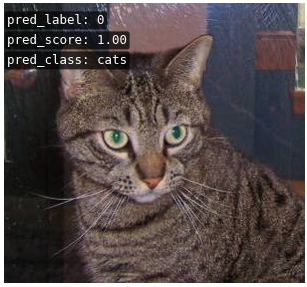

In [17]:
%matplotlib inline
# 验证训练好的模型

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)

show_result_pyplot(model, img, result)